In [ ]:
# source: https://www.kaggle.com/notaapple/detailed-exploratory-data-analysis-using-r



In [ ]:
# load data 

In [1]:
load.libraries = c('data.table', 'testthat', 'gridExtra', 'corrplot', 'GGally', 'ggplot2', 'e1071', 'dplyr')

In [15]:
install.lib <- load.libraries[!load.libraries %in% installed.packages()]
for(libs in install.lib) install.packages(libs, dependences = TRUE)
sapply(load.libraries, require, character = TRUE)

also installing the dependencies ‘prettyunits’, ‘progress’, ‘reshape’

Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘prettyunits’ failed”Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘progress’ failed”Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘reshape’ failed”Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘GGally’ failed”Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘e1071’ failed”Loading required package: testthat
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘testthat’”Loading required package: GGally
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“the

data.table   testthat  gridExtra   corrplot     GGally    ggplot2      e1071 
      TRUE      FALSE       TRUE       TRUE      FALSE       TRUE      FALSE 
     dplyr 
      TRUE

In [12]:
install.packages('testthat')

also installing the dependencies ‘cli’, ‘praise’

Warning message in install.packages("testthat"):
“installation of package ‘testthat’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [13]:
install.packages('e1071')

Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [14]:
library(dtplyr)

In [9]:
install.packages('dtplyr')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [10]:
library('dtplyr')

In [16]:
train <- read.csv(file = "/Users/omer/Downloads/train.csv", header = T, sep = ",", stringsAsFactors = F)

In [21]:
train[1, ]

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500


# check which columns are categorical 

In [23]:
cat_var <- names(train)[which(sapply(train, is.character))]
cat_car <- c(cat_var, 'BedroomAbvGr', 'HalfBath', ' KitchenAbvGr','BsmtFullBath', 'BsmtHalfBath', 'MSSubClass')

# check which columns are numeric

In [24]:
numeric_var <- names(train)[which(sapply(train, is.numeric))]

# check dimensions of data 

In [28]:
cat('there are', dim(train)[1], 'rows and', dim(train)[2],'variables (columns)')

there are 1460 rows and 81 variables (columns)

# look at the first elements from the data 

In [29]:
str(train)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


In [31]:
head(train)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [ ]:
# check for # of na's in each column.  

In [32]:
colSums(sapply(train, is.na))

Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0           259             0 
       Street         Alley      LotShape   LandContour     Utilities 
            0          1369             0             0             0 
    LotConfig     LandSlope  Neighborhood    Condition1    Condition2 
            0             0             0             0             0 
     BldgType    HouseStyle   OverallQual   OverallCond     YearBuilt 
            0             0             0             0             0 
 YearRemodAdd     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
            0             0             0             0             0 
   MasVnrType    MasVnrArea     ExterQual     ExterCond    Foundation 
            8             8             0             0             0 
     BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1 
           37            37            38            37             0 
 BsmtFinType2    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
           38             0             0             0             0 
    HeatingQC    CentralAir    Electrical     X1stFlrSF     X2ndFlrSF 
            0             0             1             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
            0             0             0             0             0 
   Functional    Fireplaces   FireplaceQu    GarageType   GarageYrBlt 
            0             0           690            81            81 
 GarageFinish    GarageCars    GarageArea    GarageQual    GarageCond 
           81             0             0            81            81 
   PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        PoolQC         Fence   MiscFeature 
            0             0          1453          1179          1406 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0

In [ ]:
# turn df to a data table

In [34]:
train = setDT(train)

In [37]:
# # of NA's in categorical variables' columns  

In [35]:
colSums(sapply(train[,.SD, .SDcols = cat_var], is.na))

MSZoning        Street         Alley      LotShape   LandContour 
            0             0          1369             0             0 
    Utilities     LotConfig     LandSlope  Neighborhood    Condition1 
            0             0             0             0             0 
   Condition2      BldgType    HouseStyle     RoofStyle      RoofMatl 
            0             0             0             0             0 
  Exterior1st   Exterior2nd    MasVnrType     ExterQual     ExterCond 
            0             0             8             0             0 
   Foundation      BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1 
            0            37            37            38            37 
 BsmtFinType2       Heating     HeatingQC    CentralAir    Electrical 
           38             0             0             0             1 
  KitchenQual    Functional   FireplaceQu    GarageType  GarageFinish 
            0             0           690            81            81 
   GarageQual    GarageCond    PavedDrive        PoolQC         Fence 
           81            81             0          1453          1179 
  MiscFeature      SaleType SaleCondition 
         1406             0             0

# # of NA's in numerical variables' columns  

In [38]:
colSums(sapply(train[,.SD, .SDcols = numeric_var], is.na))

Id    MSSubClass   LotFrontage       LotArea   OverallQual 
            0             0           259             0             0 
  OverallCond     YearBuilt  YearRemodAdd    MasVnrArea    BsmtFinSF1 
            0             0             0             8             0 
   BsmtFinSF2     BsmtUnfSF   TotalBsmtSF     X1stFlrSF     X2ndFlrSF 
            0             0             0             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd    Fireplaces 
            0             0             0             0             0 
  GarageYrBlt    GarageCars    GarageArea    WoodDeckSF   OpenPorchSF 
           81             0             0             0             0 
EnclosedPorch    X3SsnPorch   ScreenPorch      PoolArea       MiscVal 
            0             0             0             0             0 
       MoSold        YrSold     SalePrice 
            0             0             0

In [48]:
plot_Missing <- function(data_in, title = NULL){
  temp_df <- as.data.frame(ifelse(is.na(data_in), 0, 1)) # turn all values missing to 0 otherwise 1
  temp_df <- temp_df[,order(colSums(temp_df))] # order ascending - 1st column has most amount of missing..etc 
  data_temp <- expand.grid(list(x = 1:nrow(temp_df), y = colnames(temp_df))) # create a df with num rows as original_df_rows*num_columns as x and column names as y (we create all combinations which basically repeates it)
  data_temp$m <- as.vector(as.matrix(temp_df)) # take all binarized data and add it as a third column to df
  data_temp <- data.frame(x = unlist(data_temp$x), y = unlist(data_temp$y), m = unlist(data_temp$m))
  ggplot(data_temp) + geom_tile(aes(x=x, y=y, fill=factor(m))) + scale_fill_manual(values=c("white", "black"), name="Missing\n(0=Yes, 1=No)") + theme_light() + ylab("") + xlab("") + ggtitle(title)
}

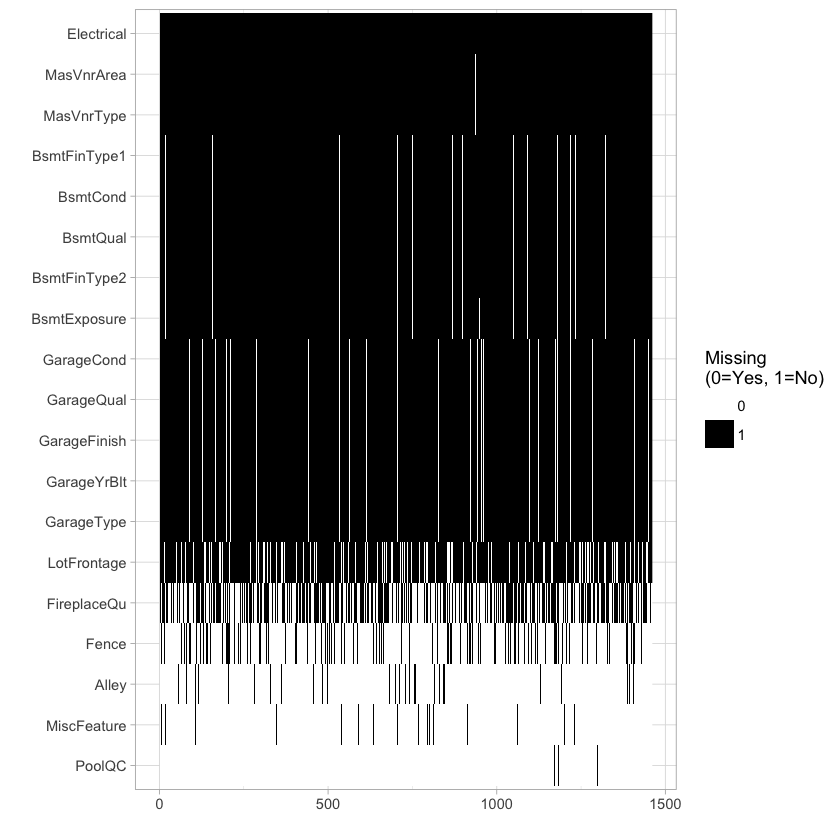

In [54]:
plot_Missing(train[,colSums(is.na(train)) > 0, with = FALSE])


In [79]:
summary(train[,.SD, .SDcols =numeric_var])

       Id           MSSubClass     LotFrontage        LotArea      
 Min.   :   1.0   Min.   : 20.0   Min.   : 21.00   Min.   :  1300  
 1st Qu.: 365.8   1st Qu.: 20.0   1st Qu.: 59.00   1st Qu.:  7554  
 Median : 730.5   Median : 50.0   Median : 69.00   Median :  9478  
 Mean   : 730.5   Mean   : 56.9   Mean   : 70.05   Mean   : 10517  
 3rd Qu.:1095.2   3rd Qu.: 70.0   3rd Qu.: 80.00   3rd Qu.: 11602  
 Max.   :1460.0   Max.   :190.0   Max.   :313.00   Max.   :215245  
                                  NA's   :259                      
  OverallQual      OverallCond      YearBuilt     YearRemodAdd 
 Min.   : 1.000   Min.   :1.000   Min.   :1872   Min.   :1950  
 1st Qu.: 5.000   1st Qu.:5.000   1st Qu.:1954   1st Qu.:1967  
 Median : 6.000   Median :5.000   Median :1973   Median :1994  
 Mean   : 6.099   Mean   :5.575   Mean   :1971   Mean   :1985  
 3rd Qu.: 7.000   3rd Qu.:6.000   3rd Qu.:2000   3rd Qu.:2004  
 Max.   :10.000   Max.   :9.000   Max.   :2010   Max.   :2010  
        

In [80]:
cat("The number of duplicated rows are", nrow(train) - nrow(unique(train)))


The number of duplicated rows are 0

In [81]:
#### Convert character to factors 

In [82]:
train[, (cat_var) := lapply(.SD, as.factor), .SDcols = cat_var]


In [91]:
train_cat <- train[,.SD, .SDcols = cat_var]
train_cont <- train[,.SD,.SDcols = numeric_var]

plotHist <- function(data_in, i) {
  data <- data.frame(x = data_in[[i]])
  p <- ggplot(data = data, aes(x=factor(x))) + stat_count() + xlab(colnames(data_in)[i]) + theme_light() + 
    theme(axis.text.x = element_text(angle = 90, hjust =1))
  return (p)
}


doPlots <- function(data_in, fun, ii, ncol=3) {
  pp <- list()
  for (i in ii) {
    p <- fun(data_in = data_in, i=i)
    pp <- c(pp, list(p))
  }
  do.call("grid.arrange", c(pp, ncol=ncol))
}


plotDen <- function(data_in, i){
  data <- data.frame(x = data_in[[i]], SalePrice = data_in$SalePrice)
  p <- ggplot(data = data) + geom_line(aes(x = x), stat = 'density', size = 1,alpha = 1.0) +
    xlab(colnames(data_in)[i]) + theme_light() 
  return(p)
   
}

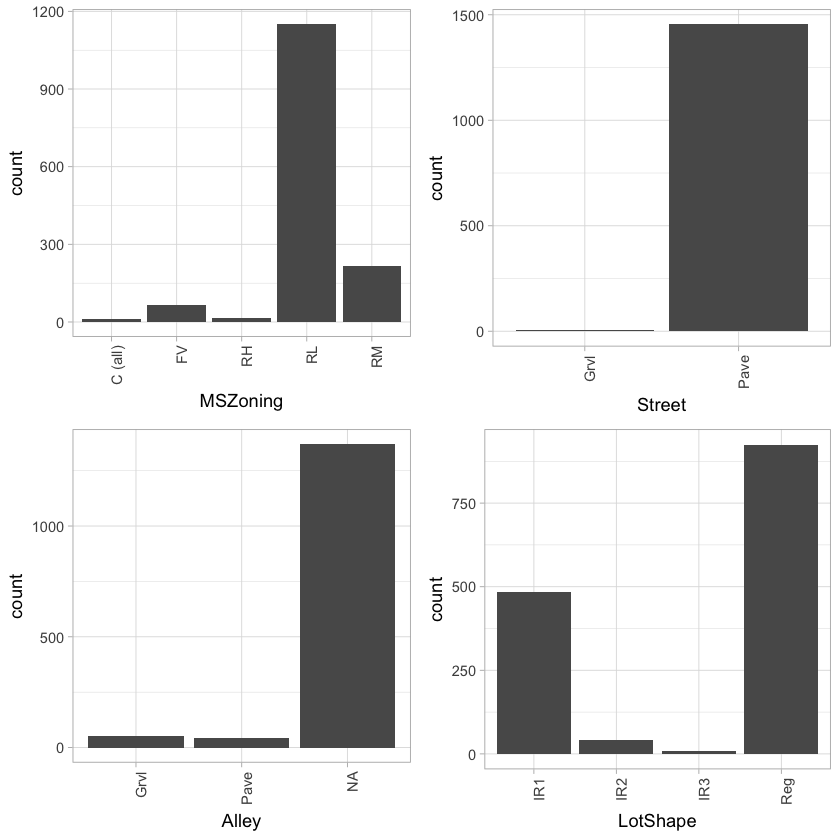

In [84]:
doPlots(train_cat, fun = plotHist, ii = 1:4, ncol = 2)

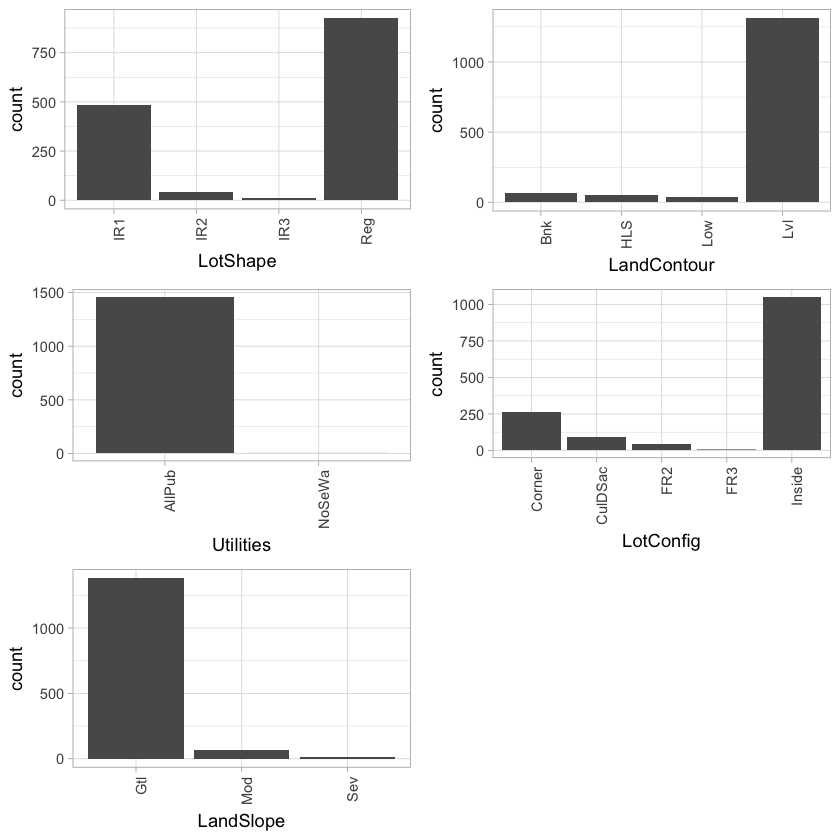

In [85]:
doPlots(train_cat, fun = plotHist, ii  = 4:8, ncol = 2)

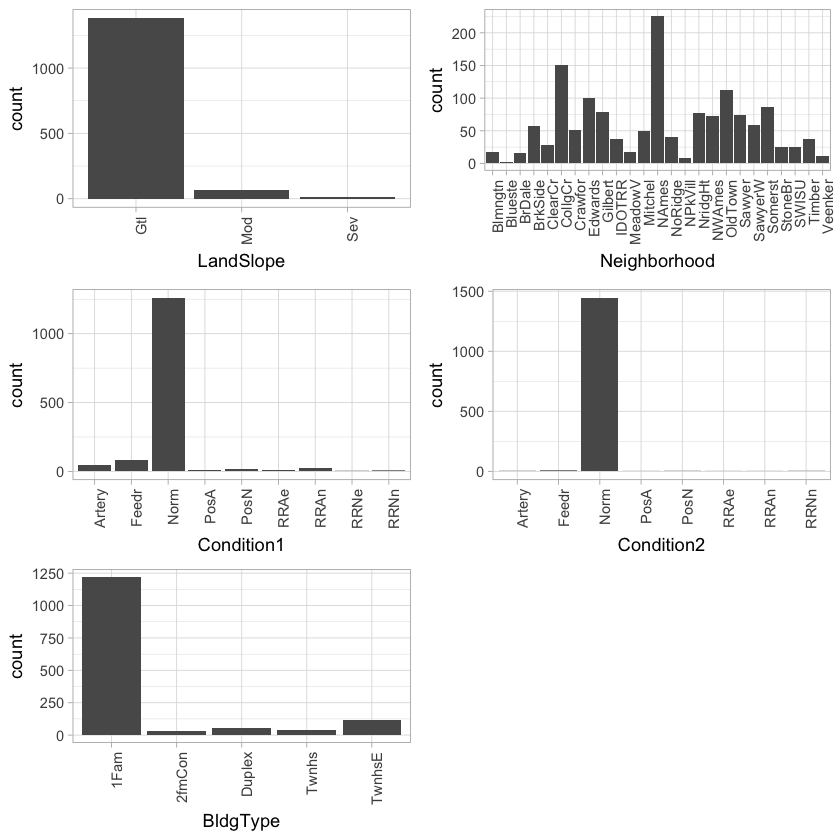

In [86]:
doPlots(train_cat, fun = plotHist, ii = 8:12, ncol = 2)


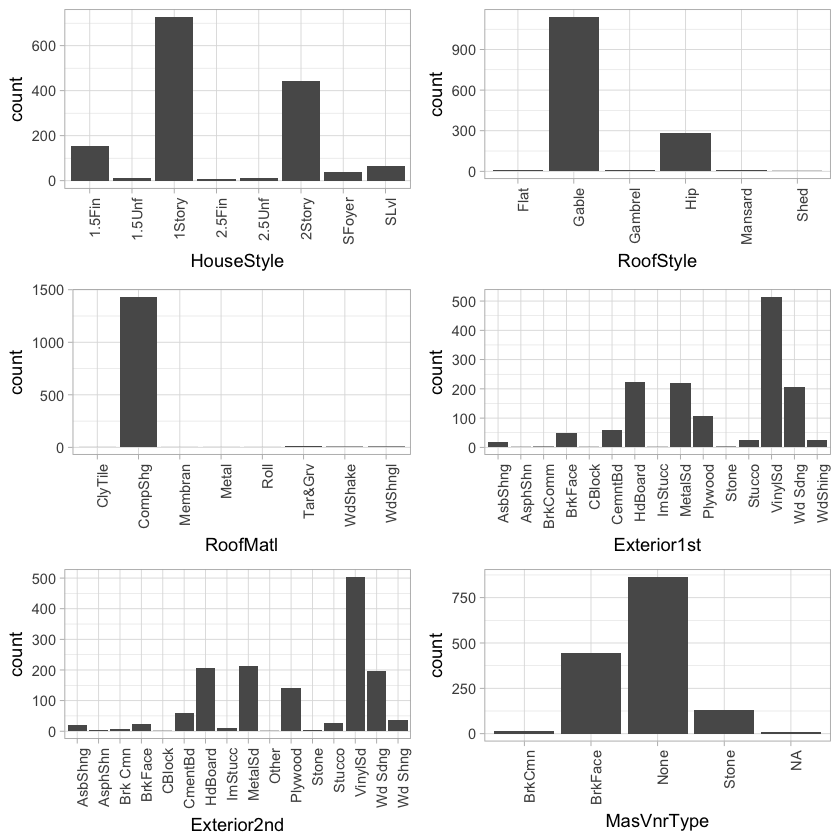

In [87]:
doPlots(train_cat, fun = plotHist, ii = 13:18, ncol = 2)


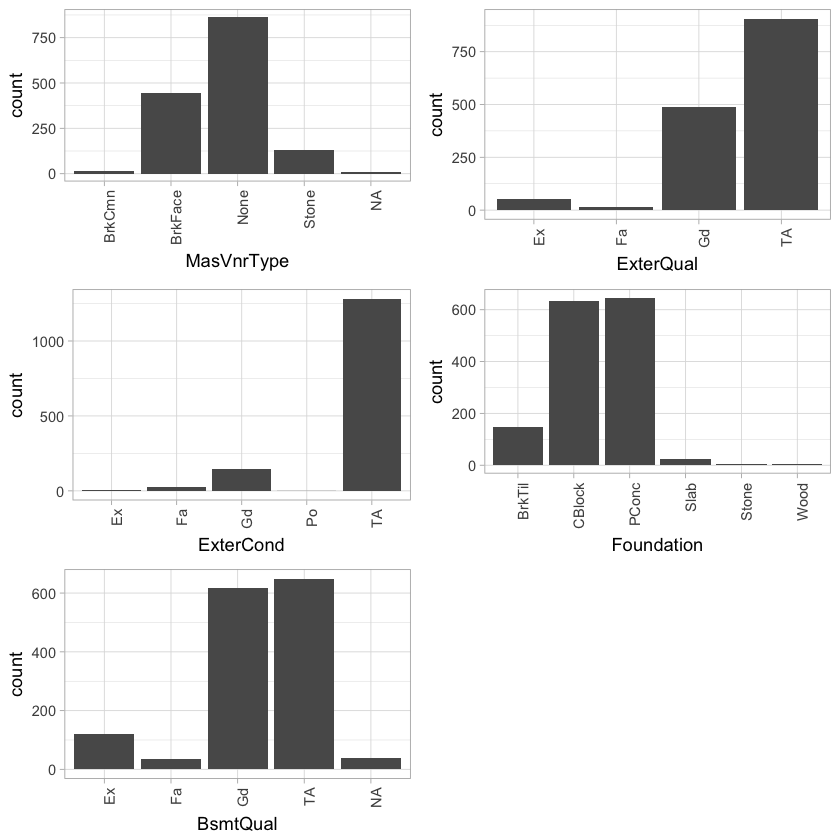

In [88]:
doPlots(train_cat, fun = plotHist, ii = 18:22, ncol = 2)


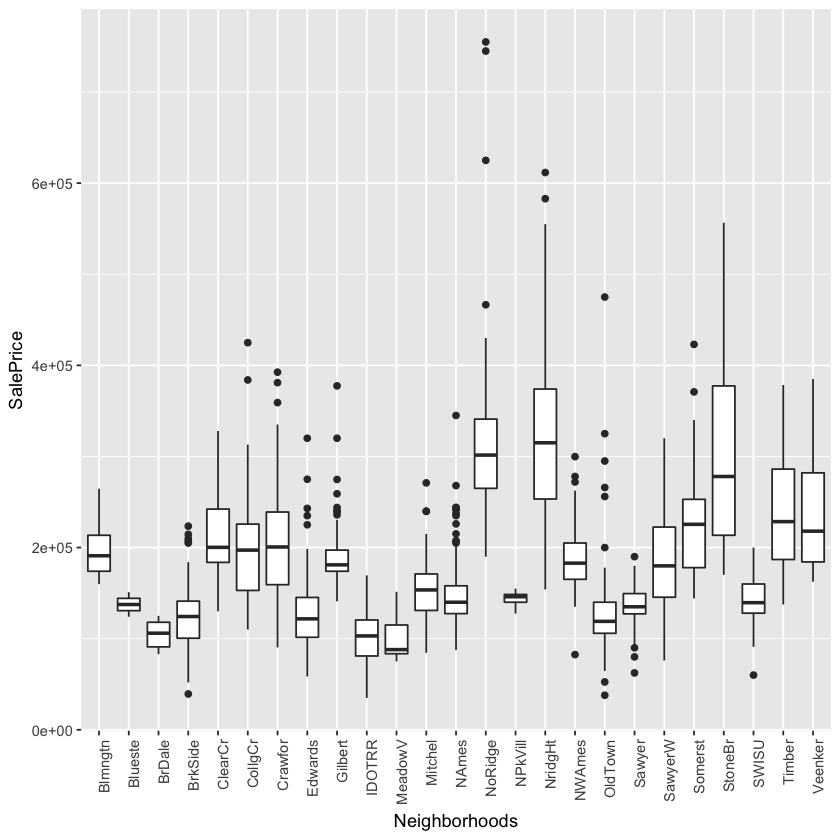

In [89]:
train %>% select(Neighborhood, SalePrice) %>% ggplot(aes(factor(Neighborhood), SalePrice)) + geom_boxplot() + theme(axis.text.x = element_text(angle = 90, hjust =1)) + xlab('Neighborhoods')


Warning message:
“Removed 259 rows containing non-finite values (stat_density).”

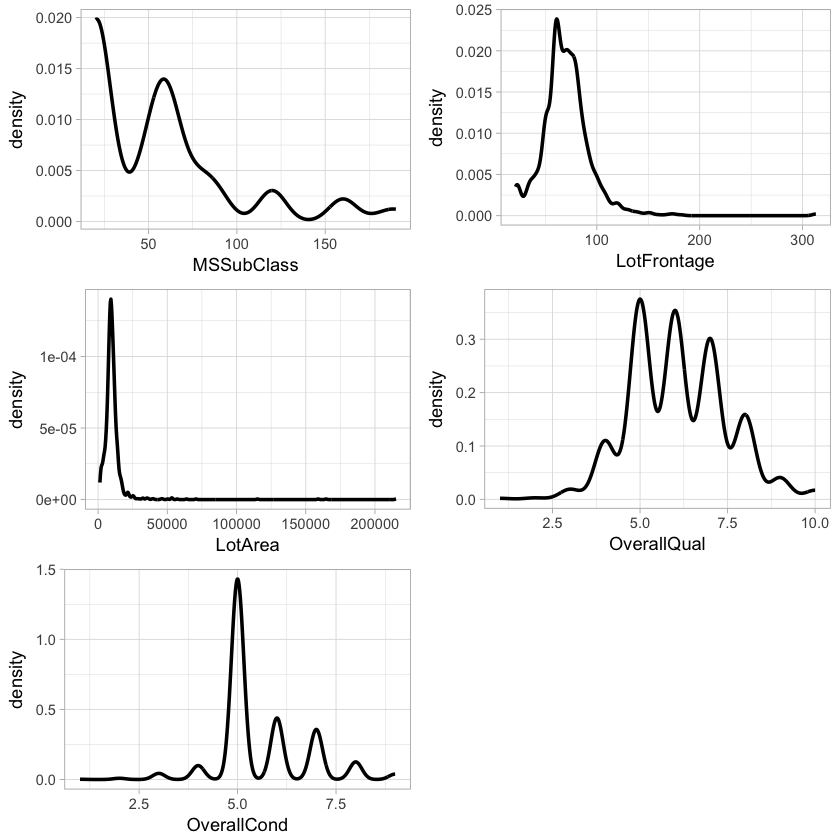

In [92]:
doPlots(train_cont, fun = plotDen, ii = 2:6, ncol = 2)

In [94]:
# Explore the correlation


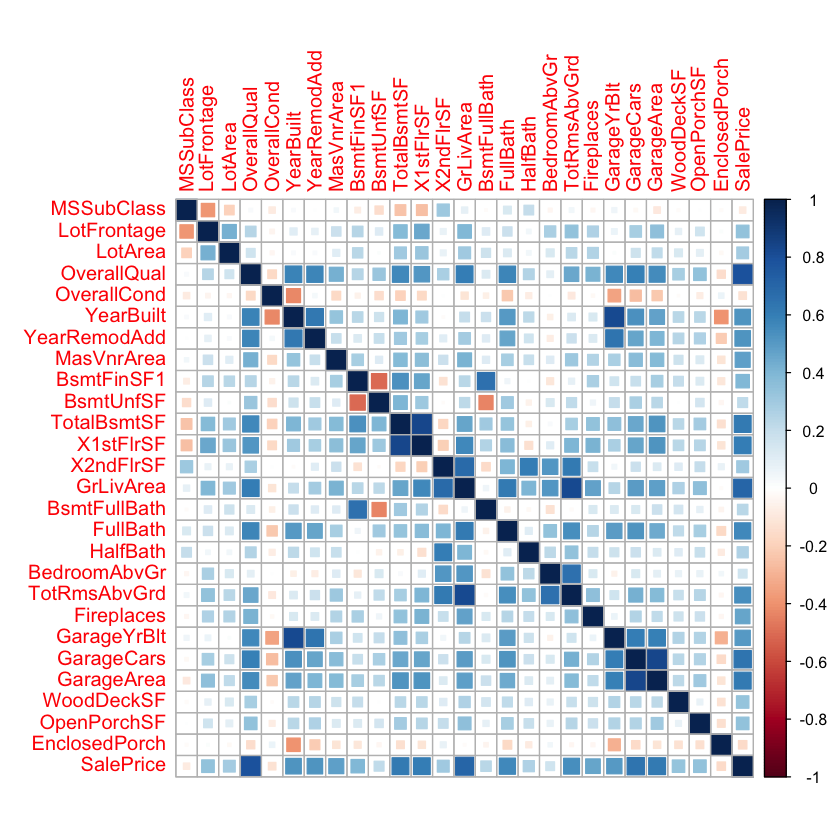

In [93]:
correlations <- cor(na.omit(train_cont[, -1, with = FALSE]))

# correlations
row_indic <- apply(correlations, 1, function(x) sum(x > 0.3 | x < -0.3) > 1)

correlations <- correlations[row_indic ,row_indic ]
corrplot(correlations, method = "square") # square just means the shape to present 

In [95]:
# Plot scatter plot for variables that have high correlation.


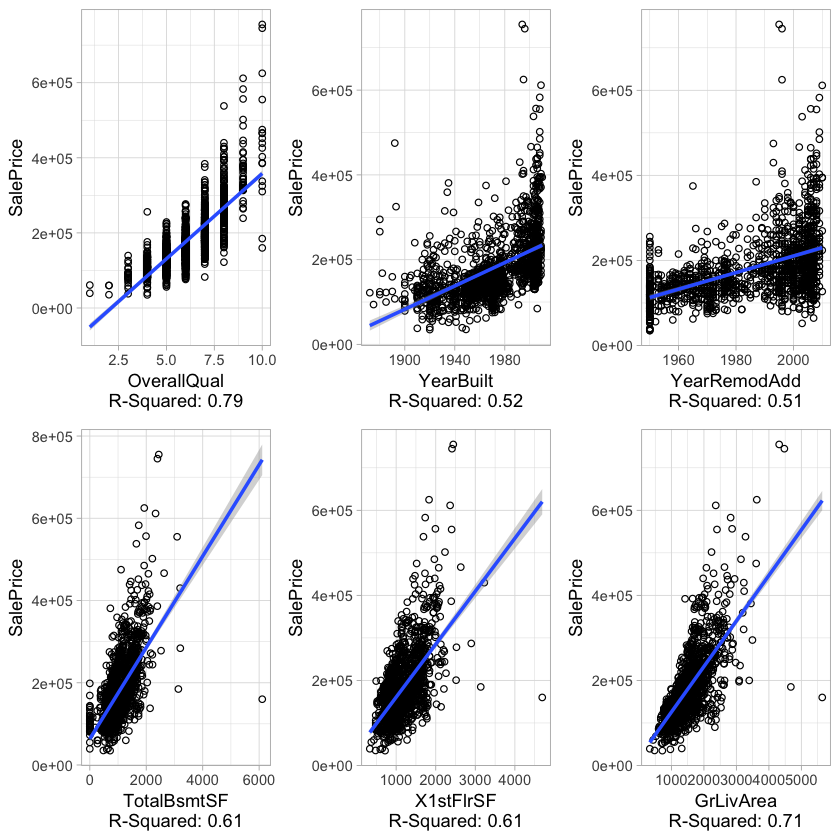

In [96]:
plotCorr <- function(data_in, i){
  data <- data.frame(x = data_in[[i]], SalePrice = data_in$SalePrice)
  p <- ggplot(data, aes(x = x, y = SalePrice)) + geom_point(shape = 1, na.rm = TRUE) + geom_smooth(method = lm ) + xlab(paste0(colnames(data_in)[i], '\n', 'R-Squared: ', round(cor(data_in[[i]], data$SalePrice, use = 'complete.obs'), 2))) + theme_light()
  return(suppressWarnings(p))
}


highcorr <- c(names(correlations[,'SalePrice'])[which(correlations[,'SalePrice'] > 0.5)], names(correlations[,'SalePrice'])[which(correlations[,'SalePrice'] < -0.2)])
 
data_corr <- train[,highcorr, with = FALSE]


doPlots(data_corr, fun = plotCorr, ii = 1:6)

In [101]:
cat_var

[1] "MSZoning"      "Street"        "Alley"         "LotShape"     
 [5] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
 [9] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[13] "HouseStyle"    "RoofStyle"     "RoofMatl"      "Exterior1st"  
[17] "Exterior2nd"   "MasVnrType"    "ExterQual"     "ExterCond"    
[21] "Foundation"    "BsmtQual"      "BsmtCond"      "BsmtExposure" 
[25] "BsmtFinType1"  "BsmtFinType2"  "Heating"       "HeatingQC"    
[29] "CentralAir"    "Electrical"    "KitchenQual"   "Functional"   
[33] "FireplaceQu"   "GarageType"    "GarageFinish"  "GarageQual"   
[37] "GarageCond"    "PavedDrive"    "PoolQC"        "Fence"        
[41] "MiscFeature"   "SaleType"      "SaleCondition"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


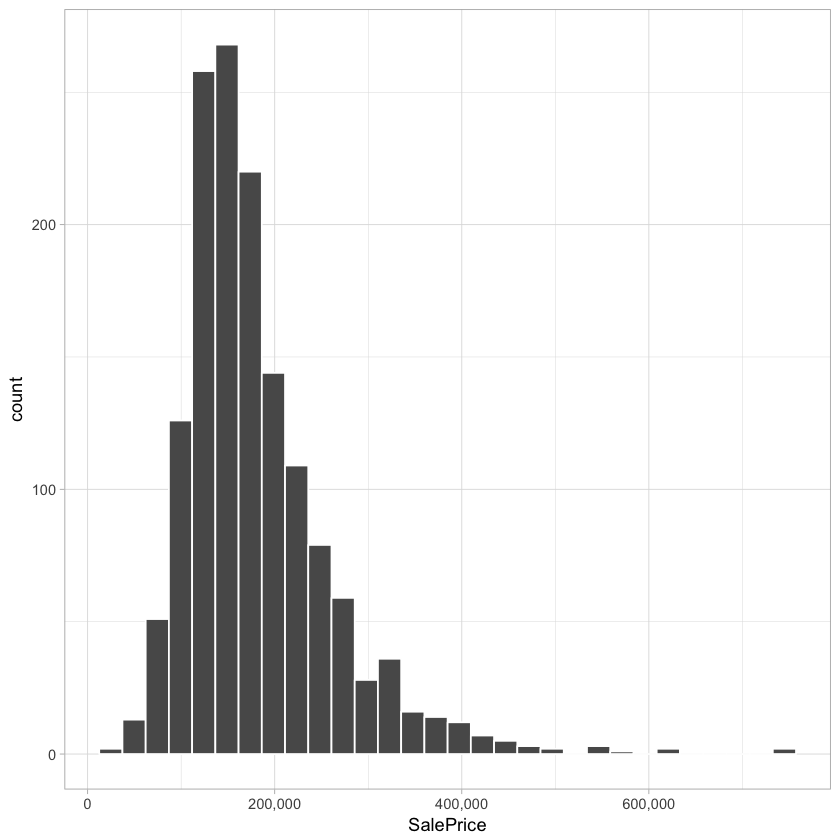

In [102]:
library(scales)
ggplot(train, aes(x = SalePrice)) + geom_histogram(col = 'white') + theme_light() +scale_x_continuous(labels = comma)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


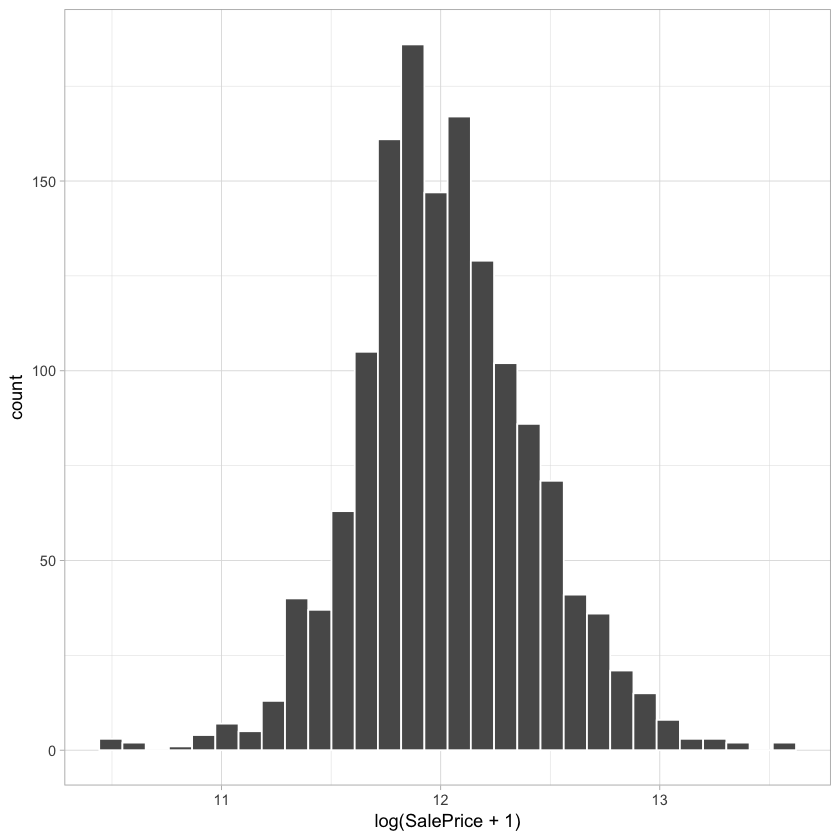

In [103]:
#Normalize distribution
ggplot(train, aes(x=log(SalePrice+1))) + geom_histogram(col = 'white') + theme_light()
